In [3]:
import tensorflow as tf
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras import *
from keras.src.layers import Dense, LeakyReLU, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Data read in

image_size = (32, 32)
batch_size = 500

train_data, val_data = keras.utils.image_dataset_from_directory(
    "C:/Users/esteb/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/Data/train",
    labels="inferred",
    validation_split=0.2,
    subset="both",
    seed=1354,
    image_size=image_size,
    batch_size=batch_size,
)


def normalize_data(data, label):
    data = tf.cast(data, tf.float32) / 255.0
    return data, label

print("Training Classes:")
class_names = train_data.class_names
print(class_names)

train_data = train_data.map(normalize_data)
val_data = val_data.map(normalize_data)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.
Training Classes:
['FAKE', 'REAL']
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


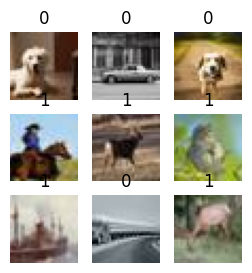

In [6]:
# Data Visualization

plt.figure(figsize=(3, 3))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [9]:

""" def residual_block(x, filters, kernel_size=3):
    shortcut = x
    
    out = keras.layers.Conv2D(filters, kernel_size, padding='same')(x)
    out = keras.layers.BatchNormalization()(out)
    out = keras.layers.Activation('relu')(out)
    
    out  = keras.layers.Conv2D(filters, kernel_size, padding='same')(out)
    out = keras.layers.BatchNormalization()(out)
    
    if downsample: #x.shape[-1] != shortcut.shape[-1]
        #shortcut = keras.layers.Conv2D(filters, 1)(shortcut)
        #shortcut = keras.layers.BatchNormalization()(shortcut)
        shortcut = keras.layers.Conv2D(filters, 1, strides=(2, 2), padding='same')(shortcut)
        shortcut = keras.layers.BatchNormalization()(shortcut)
        #shortcut = keras.layers.MaxPooling2D((2, 2))(x) 
    
    out = keras.layers.add([shortcut, out])
    out = keras.layers.Activation('relu')(out)
    return out """


def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = keras.layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    
    x = keras.layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    
    if x.shape[-1] != shortcut.shape[-1]:
        shortcut = keras.layers.Conv2D(filters, 1)(shortcut)
        shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.add([shortcut, x])
    x = keras.layers.Activation('relu')(x)
    return x

inputs = keras.Input(shape=(32, 32, 3))

#Initial Convolutional layer
x = keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#Redisual blocks
x = residual_block(x, 32)
x = keras.layers.MaxPooling2D((2, 2))(x) #downsample
x = residual_block(x, 64)
x = residual_block(x, 64)

#dropout layer
x = keras.layers.Dropout(0.5)(x)

#Output and global average
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs, outputs)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [10]:
epochs = 8

callbacks = [
    keras.callbacks.ModelCheckpoint("FirstAttemptResNet_save_at_{epoch}.keras"),
]

history = model.fit(
    train_data,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_data,
)

Epoch 1/8


C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


160/160 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7932 - loss: 0.4855 - val_accuracy: 0.8309 - val_loss: 0.4035
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9215 - loss: 0.2020 - val_accuracy: 0.8848 - val_loss: 0.2861
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9366 - loss: 0.1671 - val_accuracy: 0.9252 - val_loss: 0.1906
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9438 - loss: 0.1476 - val_accuracy: 0.9218 - val_loss: 0.2132
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9486 - loss: 0.1371 - val_accuracy: 0.8684 - val_loss: 0.3769
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9528 - loss: 0.1253 - val_accuracy: 0.9194 - val_loss: 0.2168
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9547 - loss: 0.1201 - val_accuracy: 0.9394 - val_loss: 0.1550
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9578 - loss: 0.1121 - val_accuracy: 0.9490 - val

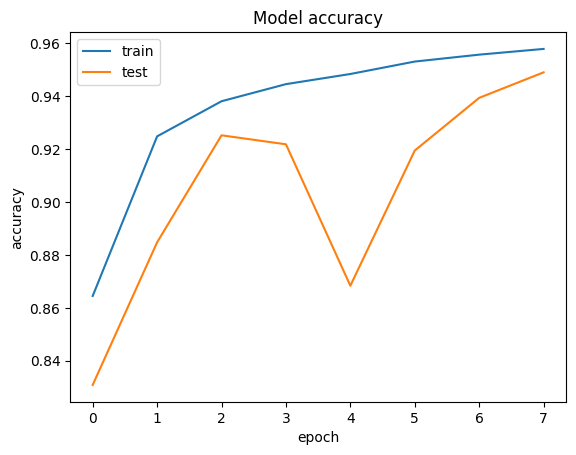

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

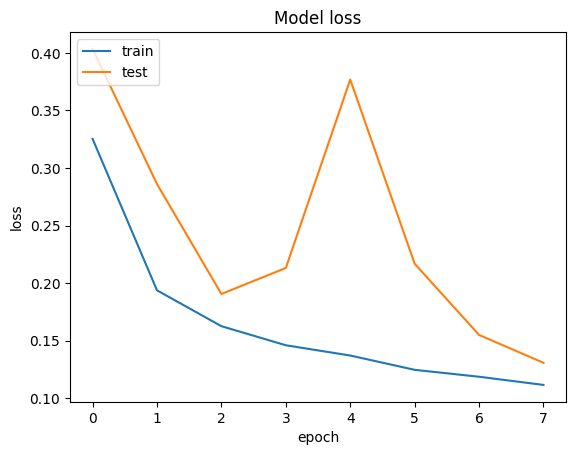

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
model = keras.models.load_model("FirstAttemptResNet_save_at_8.keras")
from keras.preprocessing.image import load_img
test_cat = load_img("C:/Users/Esteban/Downloads/merlin_212276709_3104aef5-3dc4-4288-bb44-9e5624db0b37-superJumbo.jpg")
#"C:\Users\Esteban\Downloads\merlin_212276709_3104aef5-3dc4-4288-bb44-9e5624db0b37-superJumbo.jpg"

print(type(test_cat))
print(test_cat.format)
print(test_cat.mode)
print(test_cat.size)

test_cat = test_cat.resize((32, 32))

test_cat = np.array(test_cat).reshape(-1, 32, 32, 3)
test_cat = test_cat/255.0
print(test_cat)

print(model.predict(test_cat))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(2048, 1365)
[[[[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00784314 0.00784314 0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00784314 0.01176471 0.00392157]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00784314 0.00392157 0.00392157]
   ...
   [0.10588235 0.0745098  0.05490196]
   [0.07843137 0.03921569 0.02745098]
   [0.02352941 0.00